In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

**Importing the dataset**

In [ ]:
df = pd.read_csv("Social_Network_Ads.csv")

In [ ]:
sna = df.copy()

In [ ]:
sna

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
sna.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [ ]:
sna.drop(['User ID', 'Gender'], axis  = 1, inplace = True)

In [ ]:
sna

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [ ]:
sna.columns

Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')

**Splitting the dataset into the Training set and Test set**

In [ ]:
x = df[['Age','EstimatedSalary']]
y = df['Purchased']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33,random_state = 10)

**Feature Scaling**

In [ ]:
scaler = StandardScaler()
tx_train = scaler.fit_transform(x_train)
tx_test = scaler.transform(x_test)

**Fitting Random Forest to the Training set**

In [ ]:
DTF = RandomForestClassifier()
DTF.fit(tx_train,y_train)

RandomForestClassifier()

**Predicting the Test set results**

In [ ]:
pred = DTF.predict(tx_test)


**Making the Confusion Matrix**

In [ ]:
confusion_matrix(y_true = y_test,y_pred = pred)


array([[78, 10],
       [ 1, 43]])

In [ ]:
accuracy_score(y_true = y_test,y_pred = pred)

0.9166666666666666

**Visualising the Training set results**

Text(0, 0.5, 'salary')

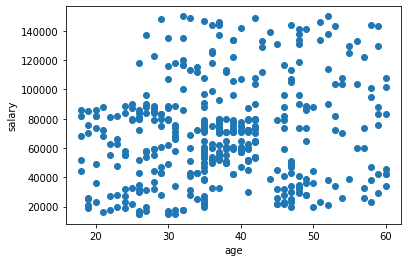

In [ ]:
plt.scatter('Age','EstimatedSalary',data =df)
plt.xlabel('age')
plt.ylabel('salary')


**Visualising the Test set results**

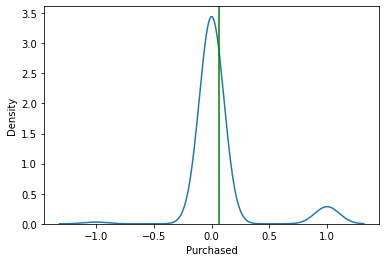

In [ ]:
sns.kdeplot(pred-y_test)
plt.axvline((pred-y_test).mean(),color = 'green')